,date_month,type,categoryName,amount(renminbi)
0,2023-08,Expense,Contact fee,6.0
1,2023-08,Expense,Education,575.0
2,2023-08,Expense,Electronics,150.0
3,2023-08,Expense,Food,541.4
4,2023-08,Expense,Medical,38.5
5,2023-08,Expense,Transportation,42.0
6,2023-09,Expense,Clothes,62.0
7,2023-09,Expense,Exercise,28.0
8,2023-09,Expense,Food,145.0
9,2023-09,Expense,Medical,51.0


,date_month,type,categoryName,amount(renminbi)
0,2023-08,Income,Investment,2.79
1,2023-08,Income,Refund,23.00
2,2023-08,Income,Salary,13278.00


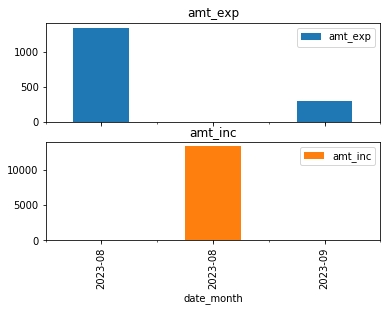

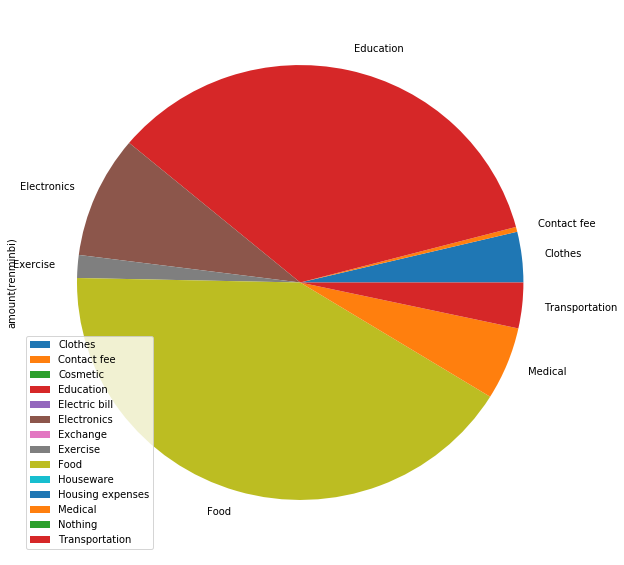

In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv("moneynote_202309.csv", parse_dates=["inputDate"], skipinitialspace=True)
#print(df.info())

#df['inputDate'] = pd.to_datetime(df['inputDate'].str.strip(), format='%Y/%m/%d')
#print(df.info())
df["amount(renminbi)"] = df["amount(renminbi)"]/100
df["date_month"] = df["inputDate"].dt.to_period('M')
#print(df[(df['inputDate'] > "2023-08-01") & (df['inputDate'] < "2023-08-30")])
grouped_expense = df[df["type"] == 'Expense'].groupby(["date_month","type","categoryName"],as_index=False)["amount(renminbi)"].sum()
#print(grouped_expense.info())
display(grouped_expense)

grouped_income = df[df["type"] == 'Income'].groupby(["date_month","type","categoryName"],as_index=False)["amount(renminbi)"].sum()
#print(grouped_income.info())
display(grouped_income)

grouped = df.groupby(["date_month","type"],as_index=False)["amount(renminbi)"].sum()


# grouped_category = df[df["type"] == 'Expense'].groupby(["categoryName"],as_index=False)["amount(renminbi)"].sum()
# grouped_category.set_index('categoryName', inplace=True)
# display(grouped_category)

%matplotlib inline
#grouped_expense['inputDate'] = grouped_expense['inputDate'].astype(np.int64)
#grouped_income['inputDate'] = grouped_income['inputDate'].astype(np.int64)

grouped['amt_exp'] = grouped[grouped["type"] == 'Expense']['amount(renminbi)']
grouped['amt_inc'] = grouped[grouped["type"] == 'Income']['amount(renminbi)']

#grouped.plot(x='date_month',y=['amt_exp','amt_inc'],kind="bar")
grouped.plot(x='date_month',y=['amt_exp','amt_inc'],kind="bar",subplots=True)


grouped_category.plot(y='amount(renminbi)',kind="pie",use_index='categoryName',figsize=(10,10))